In [1]:
from graphe import Graph 
import numpy as np
import matplotlib.pyplot as plt

# Roy-Warshall

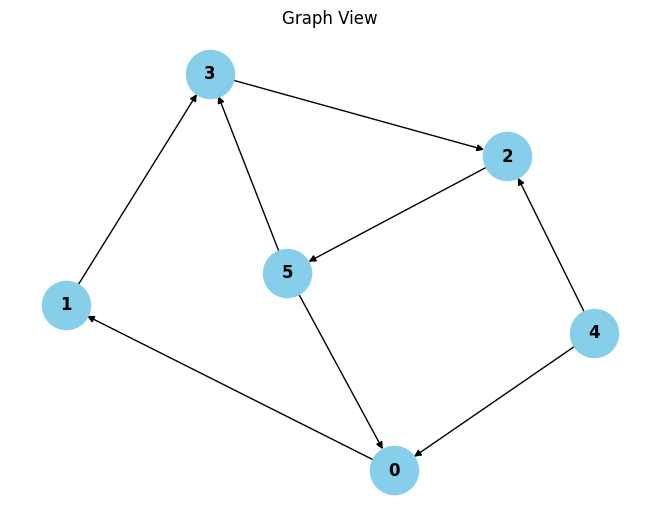

     R0                P0
[1 1 0 0 0 0]     [1 1 0 0 0 0]
[0 1 0 1 0 0]     [0 2 0 2 0 0]
[0 0 1 0 0 1]     [0 0 3 0 0 3]
[0 0 1 1 0 0]     [0 0 4 4 0 0]
[1 0 1 0 1 0]     [5 0 5 0 5 0]
[1 0 0 1 0 1]     [6 0 0 6 0 6]
_________
     R1                P1
[1 1 0 0 0 0]     [1 1 0 0 0 0]
[0 1 0 1 0 0]     [0 2 0 2 0 0]
[0 0 1 0 0 1]     [0 0 3 0 0 3]
[0 0 1 1 0 0]     [0 0 4 4 0 0]
[1 1 1 0 1 0]     [5 1 5 0 5 0]
[1 1 0 1 0 1]     [6 1 0 6 0 6]
_________
     R2                P2
[1 1 0 1 0 0]     [1 1 0 2 0 0]
[0 1 0 1 0 0]     [0 2 0 2 0 0]
[0 0 1 0 0 1]     [0 0 3 0 0 3]
[0 0 1 1 0 0]     [0 0 4 4 0 0]
[1 1 1 1 1 0]     [5 1 5 2 5 0]
[1 1 0 1 0 1]     [6 1 0 6 0 6]
_________
     R3                P3
[1 1 0 1 0 0]     [1 1 0 2 0 0]
[0 1 0 1 0 0]     [0 2 0 2 0 0]
[0 0 1 0 0 1]     [0 0 3 0 0 3]
[0 0 1 1 0 1]     [0 0 4 4 0 3]
[1 1 1 1 1 1]     [5 1 5 2 5 3]
[1 1 0 1 0 1]     [6 1 0 6 0 6]
_________
     R4                P4
[1 1 1 1 0 1]     [1 1 4 2 0 3]
[0 1 1 1 0 1]     [0 2 4 2 0 3

In [2]:
M = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0]
])

G = Graph(oriented=True)
G.load_from_matrix(M)
G.plot_graph(seed=42)

AC, pi = G.roy_warshall(verbose=True)
print("Accessibility matrix:")
print(AC.astype(int))
print("_________")
print("Predecessors matrix:")
print(pi)
print("_________")
begin, end = 1, 6
print(f"a path from {begin} to {end} is : {G.find_path(pi, begin, end)}")

# Floyd-Warshall

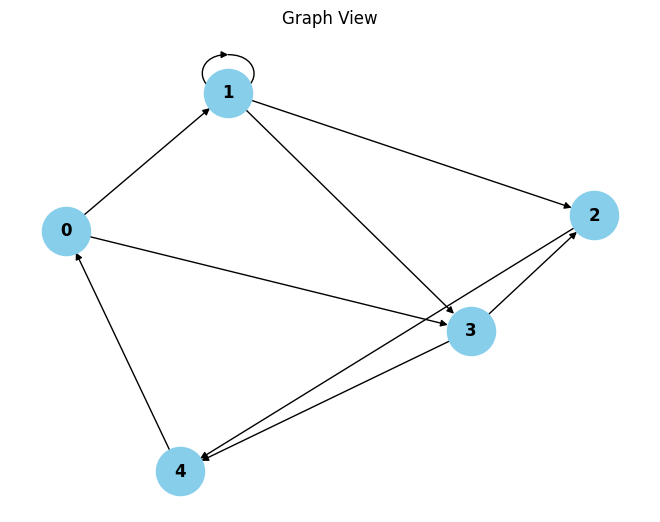

          D0                  P0
[ 0.  4. inf -3. inf]     [1 1 0 1 0]
[inf  0.  1.  2. inf]     [0 2 2 2 0]
[inf inf  0. inf  2.]     [0 0 3 0 3]
[inf inf -3.  0.  5.]     [0 0 4 4 4]
[ 7. inf inf inf  0.]     [5 0 0 0 5]
_________
          D1                  P1
[ 0.  4. inf -3. inf]     [1 1 0 1 0]
[inf  0.  1.  2. inf]     [0 2 2 2 0]
[inf inf  0. inf  2.]     [0 0 3 0 3]
[inf inf -3.  0.  5.]     [0 0 4 4 4]
[ 7. 11. inf  4.  0.]     [5 1 0 1 5]
_________
          D2                  P2
[ 0.  4.  5. -3. inf]     [1 1 2 1 0]
[inf  0.  1.  2. inf]     [0 2 2 2 0]
[inf inf  0. inf  2.]     [0 0 3 0 3]
[inf inf -3.  0.  5.]     [0 0 4 4 4]
[ 7. 11. 12.  4.  0.]     [5 1 2 1 5]
_________
          D3                  P3
[ 0.  4.  5. -3.  7.]     [1 1 2 1 3]
[inf  0.  1.  2.  3.]     [0 2 2 2 3]
[inf inf  0. inf  2.]     [0 0 3 0 3]
[inf inf -3.  0. -1.]     [0 0 4 4 3]
[ 7. 11. 12.  4.  0.]     [5 1 2 1 5]
_________
          D4                  P4
[ 0.  4. -6. -3. -4.]     [1 1 4 1 

In [3]:
M = np.array([
    [np.inf, 4, np.inf, -3, np.inf],
    [np.inf, 2, 1, 2, np.inf],
    [np.inf, np.inf, np.inf, np.inf, 2],
    [np.inf, np.inf, -3, np.inf, 5],
    [7, np.inf, np.inf, np.inf, np.inf]
])

G = Graph(oriented=True, valued=True)
G.load_from_matrix(M)
G.plot_graph()

D, pi = G.floyd_warshall(verbose=True)
print("The shortest distances matrix :")
print(D)
print("_________")
print("The predecessors matrix :")
print(pi)
print("_________")
begin, end = 1, 5
print(f"a path from {begin} to {end} is : {G.find_path(pi, begin, end)}")

# Dijkstra

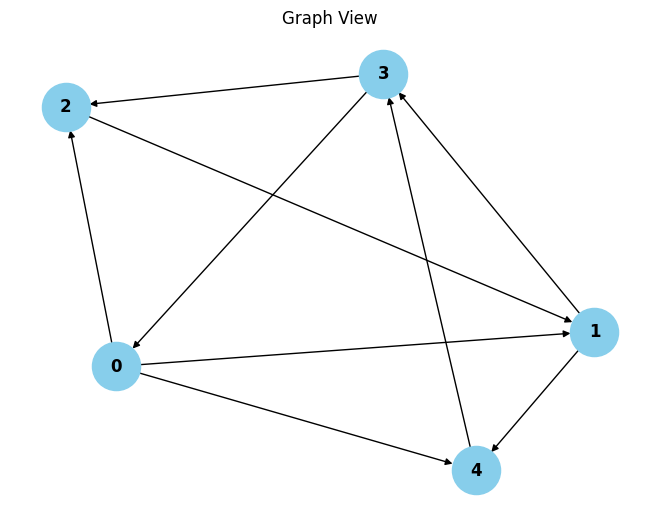

{0: [1, 2, 4], 1: [3, 4], 2: [1], 3: [0, 2], 4: [3]}
iter_0 :
distances array : [ 0. inf inf inf inf]
predecessors array : [-1 -1 -1 -1 -1]
opens array : [ True False False False False]
closed array : [False False False False False]
_________
iter_0 :
vertex_0 :
distances array : 
[ 0.  3.  8. inf  4.]
predecessors array : 
[0 1 1 0 1]
opens array : 
[ True  True  True False  True]
closed array : 
[ True False False False False]
_________
iter_1 :
vertex_1 :
distances array : 
[0. 3. 8. 4. 4.]
predecessors array : 
[0 1 1 2 1]
opens array : 
[ True  True  True  True  True]
closed array : 
[ True  True False False False]
_________
iter_2 :
vertex_3 :
distances array : 
[0. 3. 8. 4. 4.]
predecessors array : 
[0 1 1 2 1]
opens array : 
[ True  True  True  True  True]
closed array : 
[ True  True False  True False]
_________
iter_3 :
vertex_4 :
distances array : 
[0. 3. 8. 4. 4.]
predecessors array : 
[0 1 1 2 1]
opens array : 
[ True  True  True  True  True]
closed array : 
[ True  True F

In [4]:
M = np.array([[np.inf, 3, 8, np.inf, 4],
              [np.inf, np.inf, np.inf, 1, 7],
              [np.inf, 4, np.inf, np.inf, np.inf],
              [2, np.inf, 5, np.inf, np.inf],
              [np.inf, np.inf, np.inf, 6, np.inf]])

G = Graph(oriented=True, valued=True)
G.load_from_matrix(M)
G.plot_graph()
print(G.adj_dict_)
origin = 0
d, pi = G.dijkstra(origin, verbose=True)
print(f"The minimal distances from the node {origin}:")
print(d)
print("_________")
print(f"The predecessors in the shortest path from the node {origin}:")
print(pi)
print("_________")
dest = 3
print(f"The shortest path from the node {origin} to {dest}:\
    {G.shortest_path_from_origin(pi, dest, origin)}")

# Bellman-Ford

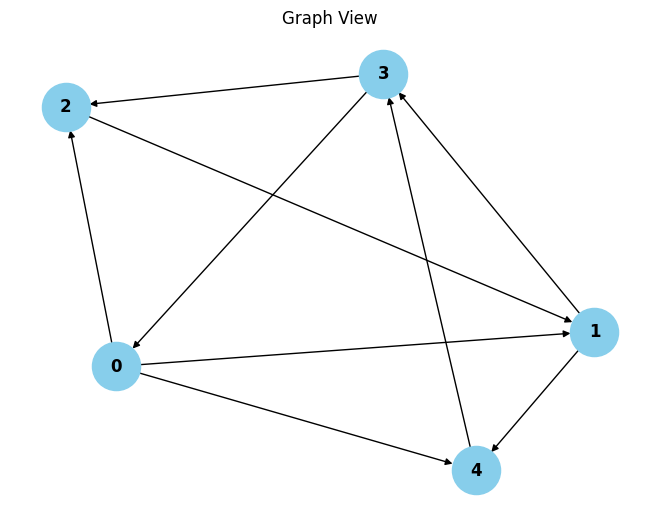

(0, 1) :
distances array : [ 0.  3. inf inf inf]
predecessors array : [0 1 0 0 0]
_________
(0, 2) :
distances array : [ 0.  3.  8. inf inf]
predecessors array : [0 1 1 0 0]
_________
(0, 4) :
distances array : [ 0.  3.  8. inf  4.]
predecessors array : [0 1 1 0 1]
_________
(1, 3) :
distances array : [0. 3. 8. 4. 4.]
predecessors array : [0 1 1 2 1]
_________
(1, 4) :
distances array : [0. 3. 8. 4. 4.]
predecessors array : [0 1 1 2 1]
_________
(2, 1) :
distances array : [0. 3. 8. 4. 4.]
predecessors array : [0 1 1 2 1]
_________
(3, 0) :
distances array : [0. 3. 8. 4. 4.]
predecessors array : [0 1 1 2 1]
_________
(3, 2) :
distances array : [0. 3. 8. 4. 4.]
predecessors array : [0 1 1 2 1]
_________
(4, 3) :
distances array : [0. 3. 8. 4. 4.]
predecessors array : [0 1 1 2 1]
_________
The minimal distances from the node 0:
[0. 3. 8. 4. 4.]
_________
The predecessors in the shortest path from the node 0:
[-1  0  0  1  0]
_________
The shortest path from the node 0 to 3:    [0, 1, 3]


In [5]:
G.plot_graph()
origin = 0
d, pi = G.bellman_ford(origin, verbose=True)
print(f"The minimal distances from the node {origin}:\n{d}")
print("_________")
print(f"The predecessors in the shortest path from the node {origin}:\n{pi}")
print("_________")
dest = 3
print(f"The shortest path from the node {origin} to {dest}:\
    {G.shortest_path_from_origin(pi, dest, origin)}")

# Depth First Search

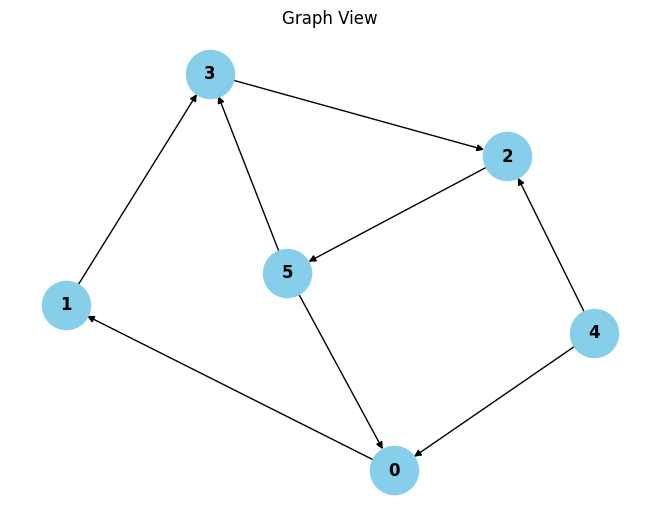

The Depth first traversal from the vertex 0 :  [0, 1, 3, 2, 5]


In [6]:
M = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0]
])

# Convert the adjacency matrix to an adjacency list
G = Graph(oriented=True)
G.load_from_matrix(M)

# You can change the seed parameter to visualise the graph differently
G.plot_graph()

origin, out = 0, []
G.depth_first_search(origin, G.visited_init(), out)
print(f"The Depth first traversal from the vertex {origin} :  {out}")

In [7]:
out = G.dfs()
print(f"The Depth first traversal of all vertices :  {out}")

The Depth first traversal of all vertices :  [0 1 3 2 5 4]


In [8]:
out = G.dfs(post=True)
print(f"The Depth first traversal - post order - :  {out}")

The Depth first traversal - post order - :  [5 2 3 1 0 4]


# Breadth First Search

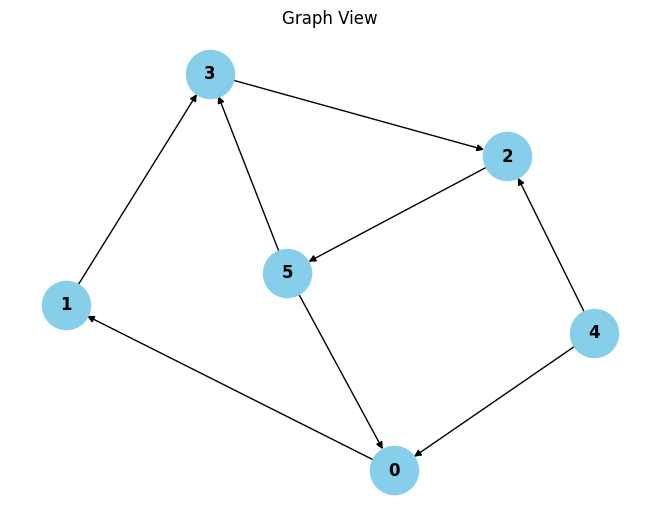

The Breadth first traversal from the vertex 0 :  [0 1 3 2 5]


In [9]:
G.plot_graph()
origin = 0
out = G.breadth_first_search(origin)
print(f"The Breadth first traversal from the vertex {origin} :  {out}")

# Tarjan Algorithm 

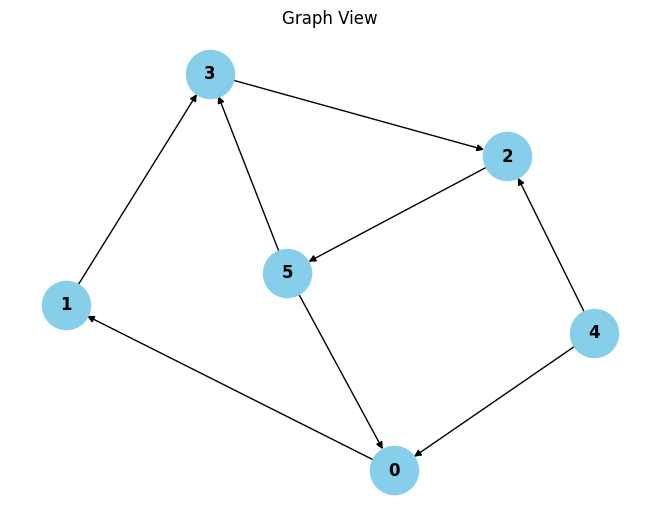

The Strongly Connected Components of adj_dict are :
[0, 1, 3, 2, 5]
[4]


In [10]:
# Plot the graph for better visualisation
G.plot_graph()

# Print the Strongly Connected Components of the graph
print("The Strongly Connected Components of adj_dict are :")
i = 0
for scc in G.tarjan():
    i += 1
    #G.cycle_draw(scc, f"Cycle {i}")
    print(scc) 

# Topological Sort

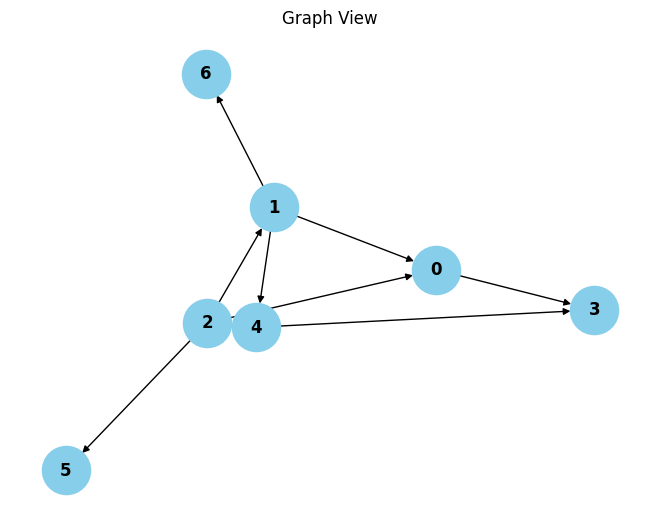

A pssible topological sort of the graph :
[2 5 1 6 4 0 3]
Valid topological sort!
{5: [6], 2: [5, 4, 3], 0: [5, 2, 1], 6: [], 4: [6], 1: [], 3: []}


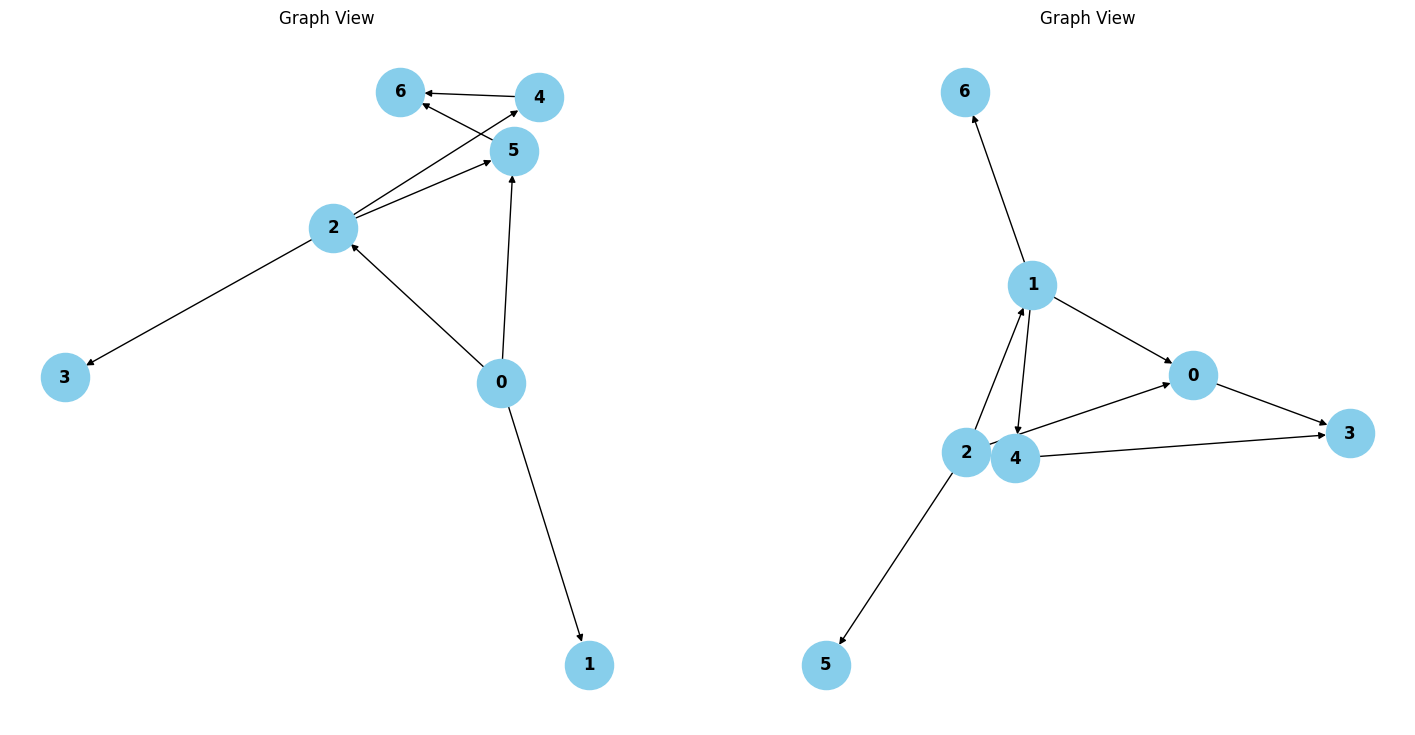

In [11]:
M = np.array([
    [0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 1],
    [1, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Convert the adjacency matrix to an adjacency list
G = Graph(oriented=True)
G.load_from_matrix(M)

# You can change the seed parameter to visualise the graph differently
G.plot_graph()

# Print a topological sort of the graph
print("A pssible topological sort of the graph :")
topo_sort = G.topological_sort(random=False)
print(topo_sort)

# check if it's a valid topological sort
if G.valid_topo_sort(topo_sort):
    print("Valid topological sort!")
    # print the sorted graph  
    new_dict = G.topological_index()
    print(new_dict)
    G2 = Graph(oriented=True)
    G2.load_from_dict(new_dict)
    
    # plot the sorted graph
    plt.figure(figsize=(18, 9))
    plt.subplot(121), plt.title("Sorted Graph")
    G2.plot_graph(seed=100, show=False)
    plt.subplot(122), plt.title("Original Graph")
    G.plot_graph(show=False)
    plt.show()
else:
    print("Not valid topological sort!")   

# Union-Find

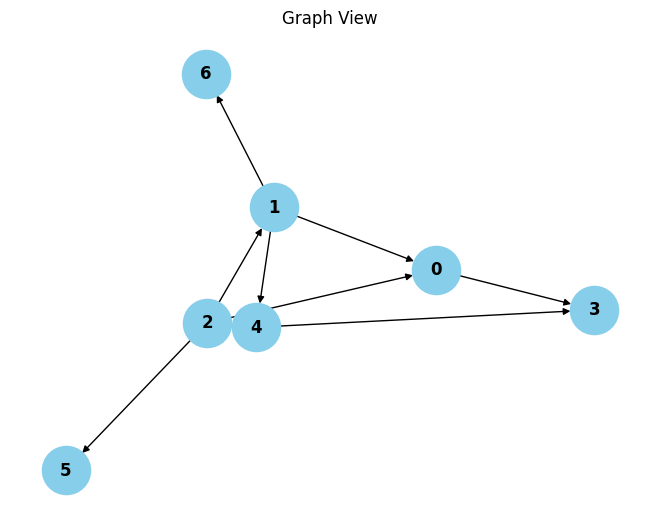

Union 2 and 3: [-1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1]
_________
Union 5 and 7: [-1 -1  3 -1 -1  7 -1 -1 -1 -1 -1 -1]
_________
Union 0 and 1: [ 1 -1  3 -1 -1  7 -1 -1 -1 -1 -1 -1]
_________
Union 4 and 7: [ 1 -1  3 -1  7  7 -1 -1 -1 -1 -1 -1]
_________
Union 8 and 9: [ 1 -1  3 -1  7  7 -1 -1  9 -1 -1 -1]
_________
Union 6 and 7: [ 1 -1  3 -1  7  7  7 -1  9 -1 -1 -1]
_________
Union 3 and 7: [ 1 -1  3  7  7  7  7 -1  9 -1 -1 -1]
_________
Union 10 and 9: [ 1 -1  3  7  7  7  7 -1  9 -1  9 -1]
_________
Union 7 and 7: [ 1 -1  3  7  7  7  7 -1  9 -1  9 -1]
_________
Union 1 and 7: [ 1  7  3  7  7  7  7 -1  9 -1  9 -1]
_________
Union 11 and 9: [ 1  7  3  7  7  7  7 -1  9 -1  9  9]
_________


array([ 1,  7,  3,  7,  7,  7,  7, -1,  9, -1,  9,  9])

In [14]:
edges = [(2, 3), (5, 7), (0, 1), (4, 5), (8, 9), (6, 7), (3, 4), (10, 9), (3, 5), (1, 7), (11, 9)]
G.load_from_edges(edges)
G.plot_graph()
G.union_find(verbose=True)